In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

# Importando os dados. 

Para importar os dados de um csv comum, usamos a função: 

[pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) - Essa função recebe como primeiro argumento o caminho para o arquivo csv que desejamos abrir. Na documentação há mais informações sobre o método, como: 

1) Indicar qual é o separador dos dados dentro do arquivo. (Geralmente é uma vírgula (,) mas caso seja outro, você pode indicar.

2) _Skiprows_  que permite pular N linhas do inicio do arquivo. E diversos outros parâmetros para importar os dados que você precisar

In [2]:
dados = pd.read_csv('../input/heart.csv')
# dataframe.head(N) -> N indica o número de linhas que devem ser mostradas
dados.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Vamos ver o que significam as colunas do dataset. 

**Tradução livre**

* **age** Idade em anos / age in years
* **sex** (1 = Homem; 0 = Mulher) / (1 = male; 0 = female)
* **cpchest** Tipo de Dor / pain type
* **trestbps** Pressão arterial em descanso em mm Hg / resting blood pressure (in mm Hg on admission to the hospital)
* **chol** Colesterol Sérico em mg/dl / serum cholestoral in mg/dl
* **fbs** Nível de Açucar no sangue em jejum (Medido em mg/dl. Se a medida for maior que 120, essa coluna assuma o valor 1. Caso menor, assume o valor 0) / (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **restecg** Resultado do Eletrocardiograma em repouso / resting electrocardiographic results
* **thalach**  Batimentos cardíacos máximo / maximum heart rate achieved
* **exang** Exercício produz dor no peito? (Sim = 1, não = 0) / exercise induced angina (1 = yes; 0 = no)
* **oldpeak**  https://en.wikipedia.org/wiki/ST_depression / ST depression induced by exercise relative to rest
* **slope** https://en.wikipedia.org/wiki/ST_segment / the slope of the peak exercise ST segment
* **ca**  Número de vasos sanguíneos coloridos por fluoroscopia / number of major vessels (0-3) colored by fluoroscopy
* **thal**  Categoria (3 = Normal; 6 = Defeito Consertado; 7 = Defeito reversível)  /  3 = normal; 6 = fixed defect; 7 = reversable defect
* **target** Tem doença? (Sim = 1, Não = 0) / 1 or 0 <- Variável alvo do dataset

# Visualização de Dados

Parte do processo do estudos dos dados é a interação com os dados e com o contexto que ele se encaixa. É popular que a idade é um fator significativo para doenças cardíacas, então seria prudente explorar os dados com relação à idade


## Distribuição da população do dataset

Essa distribuição representa homens e mulheres

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


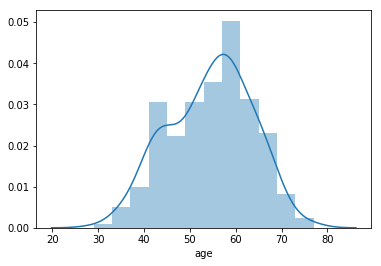

In [3]:
sns.distplot(dados['age'])

## Distribuição dos Homens


## Documentação
[sns.distplot()](https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=dist#seaborn.distplot)

[Exemplos do sns.distplot](https://seaborn.pydata.org/examples/distplot_options.html)

**Possíveis mensagens de erro e como contorná-las**

[Truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()](https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


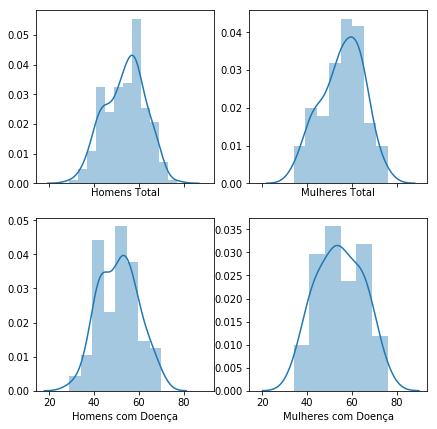

In [4]:
f, axes = plt.subplots(2, 2, figsize=(7,7), sharex=True)
sns.distplot(dados[dados['sex'] == 1]['age'], axlabel="Homens Total", ax=axes[0,0]) # Homens
sns.distplot(dados[dados['sex'] == 0]['age'], axlabel="Mulheres Total", ax=axes[0,1]) # Mulheres

# Homens e mulheres que possuem Doença Cardíaca
# dados[dados['sex'] == 1] <- Isso pode ser lido como: "dados onde dados na coluna 'sex' seja igual a 1."
# Adicionalmente, onde está essa condição, podem existir outras condições. 

homens_com_doenca_cardiaca = dados[(dados['sex'] == 1) & (dados['target'] == 1)]['age']
mulheres_com_doenca_cardiaca = dados[(dados['sex'] == 0) & (dados['target'] == 1)]['age']

sns.distplot(homens_com_doenca_cardiaca, axlabel="Homens com Doença", ax=axes[1,0]) 
sns.distplot(mulheres_com_doenca_cardiaca, axlabel="Mulheres com Doença", ax=axes[1,1]) 


##  Visualização da relação entre Idade, colesterol e a Variavel alvo

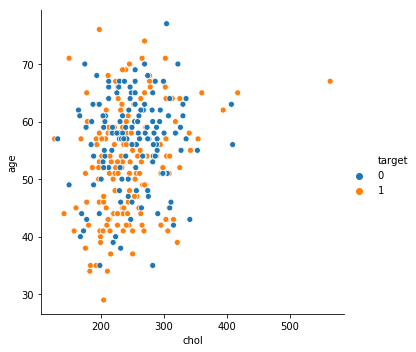

In [5]:
sns.relplot(x='chol',y='age',hue='target', data=dados)

## Quantidade de pessoas que  têm dores no peito ao fazer exercício


[Como mudar os labels dos eixos no seaborn](https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot)

[Como mudar os labels da legenda no seaborn](https://stackoverflow.com/questions/39606921/changing-pointplot-legend-in-seaborn) **Atenção** - Mudar as legendas pode ser um trabalho chatinho

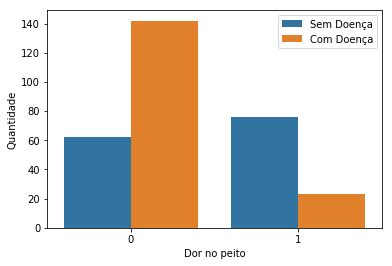

In [6]:
ax = sns.countplot('exang', hue='target', data=dados)
ax.set(xlabel='Dor no peito', ylabel='Quantidade')
legend_labels = ax.get_legend_handles_labels()[0]
ax.legend(legend_labels, ['Sem Doença', 'Com Doença'])

## Tentando identificar alguma relação com aumento da pressão arterial, idade e doenças cardíacas

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


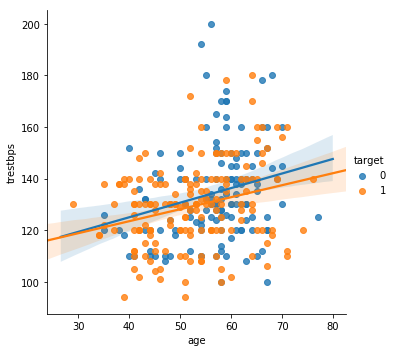

In [7]:
sns.lmplot('age', 'trestbps', hue='target', data=dados)

## Relação entre os tipos de dores no peito e Doença Cardíaca

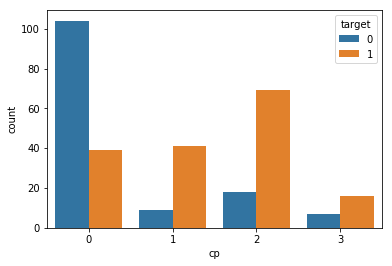

In [8]:
sns.countplot('cp', hue='target', data=dados)

## Batimentos Cardíacos Máximos x Idade e Pressão Sanguínea

o Gráfico abaixo relaciona os batimentos cardíacos máximos com a idade de cada pessoa. Adicionalmente, o tamanho dos pontos, relacionam a pressão arterial da pessoa. 


não parece existir uma separação clara entre doentes e não doentes somente com essas três innformações.

[Text(0,0.5,'Batimentos Máx'), Text(0.5,0,'Idade')]

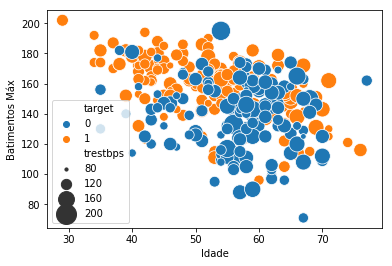

In [9]:
ax = sns.scatterplot('age','thalach', hue='target',size='trestbps',sizes=(10,400) ,data=dados)
ax.set(xlabel='Idade', ylabel='Batimentos Máx')

## Seria o oldpeak um indicador de doença no coração? 

ver: 

[St Depression](https://en.wikipedia.org/wiki/ST_depression)

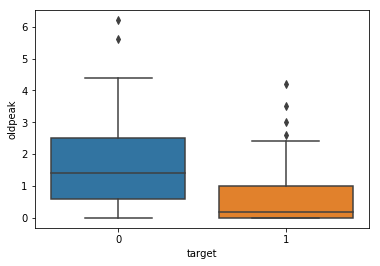

In [10]:
sns.boxplot('target', 'oldpeak',data=dados)

## Vamos ver esse mesmo plot com o Slope

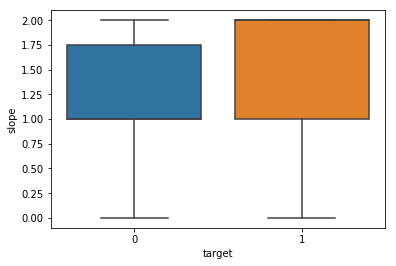

In [11]:
sns.boxplot('target', 'slope',data=dados)

## Por fim, vamos ver a distribuição de pessoas com doença


Há mais pacientes doentes que não doentes no dataset

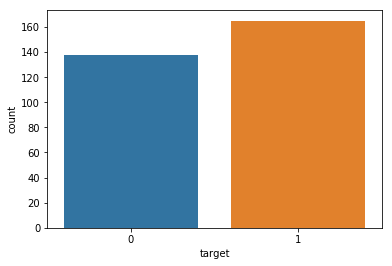

In [12]:
sns.countplot('target',data=dados)

# Tratamento de dados

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


[pd.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) é um método interessante para visualizar mais facilmente se há [outliers](https://pt.wikipedia.org/wiki/Outlier) no dataset

In [14]:
dados.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Ao utilizar a expressão: dados[column].isna().sum() contamos quantas ocorrencias de nulo existem nas colunas!

In [15]:
for column in dados.columns:
    print(dados[column].isna().sum(), column)

0 age
0 sex
0 cp
0 trestbps
0 chol
0 fbs
0 restecg
0 thalach
0 exang
0 oldpeak
0 slope
0 ca
0 thal
0 target


### Nenhuma coluna parece conter dados absurdos e nem dados faltantes. Passemos ao Machine Learning

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

## Pipeline


O uso de pipeline é algo muito interessante. Com o pipeline, podemos encadear os algoritmos como Normalização, Feature Selection, e o classificador. É bom pq realiza o encapsulamento da lógica do Modelo e você pode mexer no seu modelo com mais facilidade


### Documentação - Machine Learning


1) [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

2) [Train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

3) [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

4) [SVC - Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

5) [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

6) [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [17]:
X = dados.drop('target', axis=1)
y = dados['target']

X_treino, X_teste, y_treino, y_teste =  train_test_split(X,y)

# V1

In [18]:
pipeline = Pipeline([
    ('normalizer', Normalizer()),
    ('svc', SVC())
])

pipeline.fit(X_treino, y_treino)
predicted = pipeline.predict(X_teste)
print(classification_report(y_teste, predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.59      1.00      0.74        45

   micro avg       0.59      0.59      0.59        76
   macro avg       0.30      0.50      0.37        76
weighted avg       0.35      0.59      0.44        76



/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'pre

In [19]:
print("Score para Treino: ",pipeline.score(X_treino, y_treino))
print("Score para Teste: ", pipeline.score(X_teste, y_teste))

Score para Treino:  0.5286343612334802
Score para Teste:  0.5921052631578947


## Discussão - V1



Essas métricas indicam Underfitting do classificador. Ou seja, o classificador não foi capaz de generalizar o suficiente com os dados que foram utilizados

# V2

In [20]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

pipeline.fit(X_treino, y_treino)
predicted = pipeline.predict(X_teste)
print(classification_report(y_teste, predicted))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        31
           1       0.84      0.82      0.83        45

   micro avg       0.80      0.80      0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [21]:
print("Score para Treino: ",pipeline.score(X_treino, y_treino))
print("Score para Teste: ", pipeline.score(X_teste, y_teste))

Score para Treino:  0.9118942731277533
Score para Teste:  0.8026315789473685


/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


## Discussão V2


Houve uma melhoria das métricas! Agora o modelo consegue identificar quem não possui doenças! 

Entretanto, olhando o **Score**, parece que o modelo sofre de _OverFitting_. _OverFitting_ é quando o modelo aprende muito bem (até demais) como representar os dados de Treino, enquanto tem um desempenho inferior quando é apresentado a novas informações



## Dúvidas e Estudos Futuros

      Quando utilizar Normalizer e StandardScaler?